In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re

In [6]:
df = pd.read_csv('../data/workout_variations.csv')

def parse_workout_column(workout_str):
    return ast.literal_eval(workout_str)

df['Workout'] = df['Workout'].apply(parse_workout_column)

In [8]:
df.head()

,Goals,Level,Days,Time,Equipments,Gender,Workout
0,Build Muscle,Beginner,5,45.0,['Bodyweight'],Male,"[[{'exercise': 'Wide Push Up', 'sets': 4, 'rep..."
1,Build Muscle,Beginner,3,45.0,['Bodyweight'],Male,"[[{'exercise': 'Diamond Push Up', 'sets': 4, '..."
2,Build Muscle,Beginner,5,35.0,"['Bodyweight', 'Exercise Ball']",Male,"[[{'exercise': 'Diamond Push Up', 'sets': 4, '..."
3,Build Muscle,Beginner,3,45.0,['Bodyweight'],Male,"[[{'exercise': 'Wide Push Up', 'sets': 4, 'rep..."
4,Build Muscle,Beginner,4,35.0,['Bodyweight'],Male,"[[{'exercise': 'Diamond Push Up', 'sets': 4, '..."


In [8]:
df.isna().sum()

Goals         0
Level         0
Days          0
Time          0
Equipments    0
Gender        0
Workout       0
dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Build Muscle'),
  Text(1, 0, 'Lose Fat'),
  Text(2, 0, 'Increase Strength'),
  Text(3, 0, 'General Fitness'),
  Text(4, 0, 'Increase Endurance'),
  Text(5, 0, 'Sports Performance')])

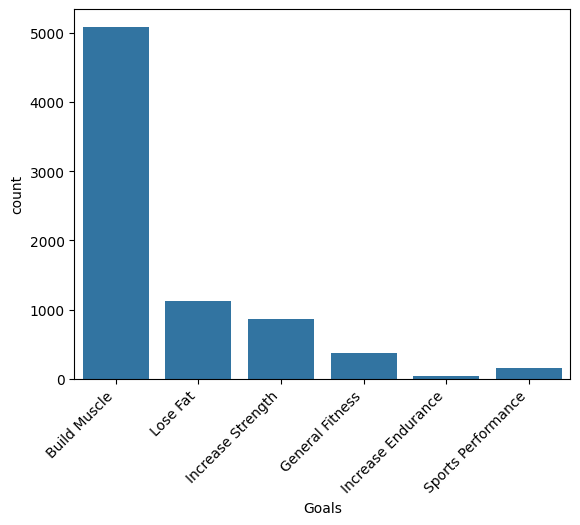

In [10]:
sns.countplot(data=df, x='Goals')
plt.xticks(rotation=45, ha='right')

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

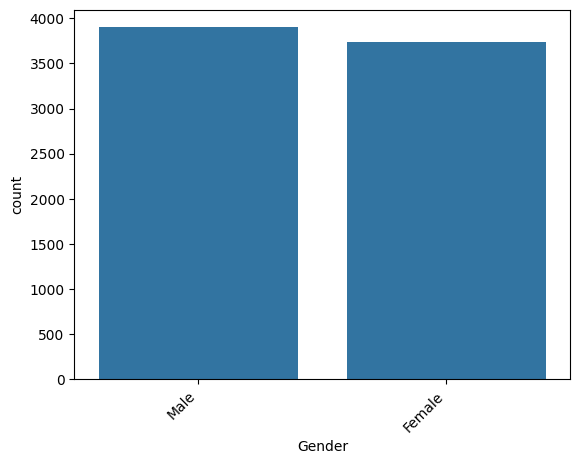

In [10]:
sns.countplot(data=df, x='Gender')
plt.xticks(rotation=45, ha='right')

([0, 1, 2],
 [Text(0, 0, 'Beginner'), Text(1, 0, 'Advanced'), Text(2, 0, 'Intermediate')])

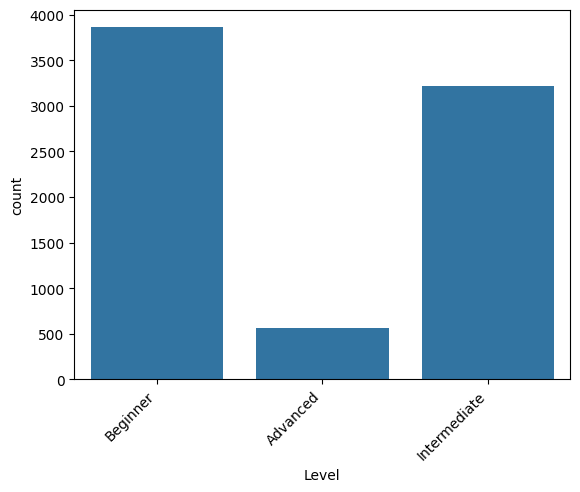

In [12]:
sns.countplot(data=df, x='Level')
plt.xticks(rotation=45, ha='right')

<Axes: xlabel='Time', ylabel='Count'>

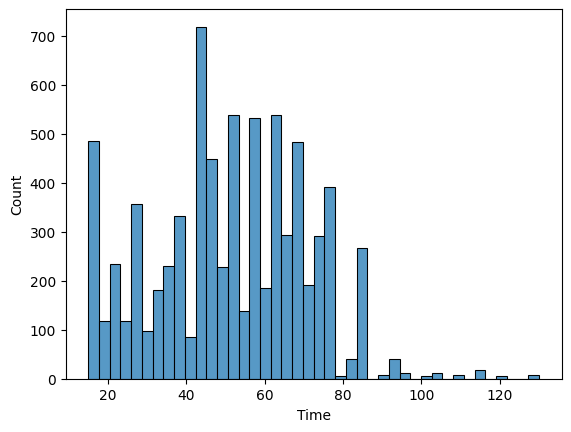

In [29]:
sns.histplot(data=df, x='Time')

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8')])

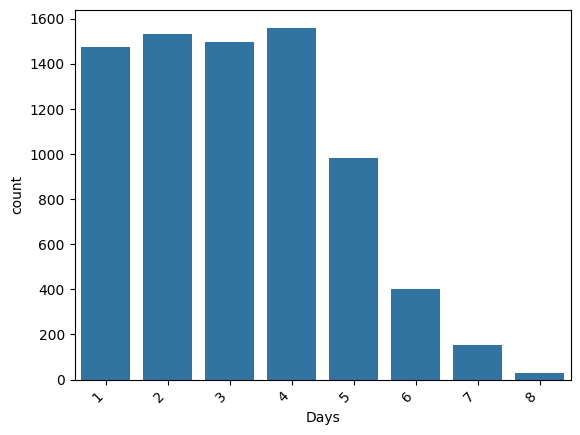

In [18]:
sns.countplot(data=df, x='Days')
plt.xticks(rotation=45, ha='right')

In [12]:
df.shape

(7640, 7)

In [14]:
df.Goals.unique()

array(['Build Muscle', 'Lose Fat', 'Increase Strength', 'General Fitness',
       'Increase Endurance', 'Sports Performance'], dtype=object)

In [16]:
df.columns

Index(['Goals', 'Level', 'Days', 'Time', 'Equipments', 'Gender', 'Workout'], dtype='object')

In [21]:
exercise_set = set()

# Loop through each workout and each exercise in the workout
for workout in df['Workout']:
    for day in workout:
        for exercise in day:
            name = exercise['exercise'].lower()
            name = re.sub(r"[^a-z0-9\s]", "", name)
            exercise_set.add(name)

# Display the result
print(exercise_set)

{'dumbbell cuban press', 'seated dumbbell biceps curl', 'single arm band standing flys', 'lying leg curl', 'jack knives', 'machine shrugs', 'smith machine shrug', 'db shrugs', 'rope hammer curl', 'tricep cable pressdowns', 'calf press ', 'smith machine incline bench press', 'set 12', 'seated leg curl or romanian deadlift', 'dumbbell stiff leg deadlift', 'smith machine press  warmup 80', 'face pull', 'pullups', 'one arm machine row', 'rack pull  above the knee', 'incline bench barbell press', 'lateral jumps', 'heavy cheat curl negatives', 'wide push up', 'giant set feetelevated pushup closegrip pullup flat bench barbell press and bentover barbell row', 'superset front squat with dumbbell stiff leg deadlift', 'leg press   muscle', 'seated leg curl ', 'one arm cable row 313 rep timing', 'bent over two arm dumbbell row', 'standing cable crunch', 'dumbbell curl', '5a trx pikes', '12 mile run', 'triset  dumbbell pullover', 'standing curl', 'one arm seated dumbbell extension pump', 'barbell c

In [14]:
exercises = pd.DataFrame({'exercise': list(exercise_set)})

In [16]:
exercises.to_csv('../data/exercises_list.csv')